# 릿지회귀

### W의 제곱에 패널티를 부여하는 L2방식에 속함

* RIdge 클래스를 이용해 보스턴 주택 가격 예측

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

### boston dataset 설명
x 
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per $10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    % lower status of the population

y
* target (PRICE)     Median value of owner-occupied homes in $1000's

In [62]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

In [63]:
boston= pd.read_csv('C:/Users/82102/Desktop/housing.csv', header=None, delimiter=r"\s+", names=column_names)
bostonDF = pd.DataFrame(boston)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [65]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace=False)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [68]:
# alpha =10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [71]:
print ('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,3))
print ('5 folds의 개별 RMSE scores:', np.round(rmse_scores,3))
print ('5 folds의 평균 RMSEL {0:.3f}'. format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSEL 5.518


* 릿지의 5개 폴드 세트의 평균 RMSE는 5.524 (규제가 없을 때보다 더 값이 작아 좋은 예측 성능 보임)

### 릿지의 alpha값을 변화시켜 가면서 RMSE와 회귀계수 살피기

In [72]:
# alpha 파라미터 정의
alphas = [0,0.1,1,10,100]

In [76]:
for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5folds의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0일 때 5folds의 평균 RMSE: 5.829
alpha 0.1일 때 5folds의 평균 RMSE: 5.788
alpha 1일 때 5folds의 평균 RMSE: 5.653
alpha 10일 때 5folds의 평균 RMSE: 5.518
alpha 100일 때 5folds의 평균 RMSE: 5.330


* alpha가 100일 때 RMSE가 5.330으로 가장 좋음

### alpha값의 변화에 따른 피처의 회귀계수 값 시각화

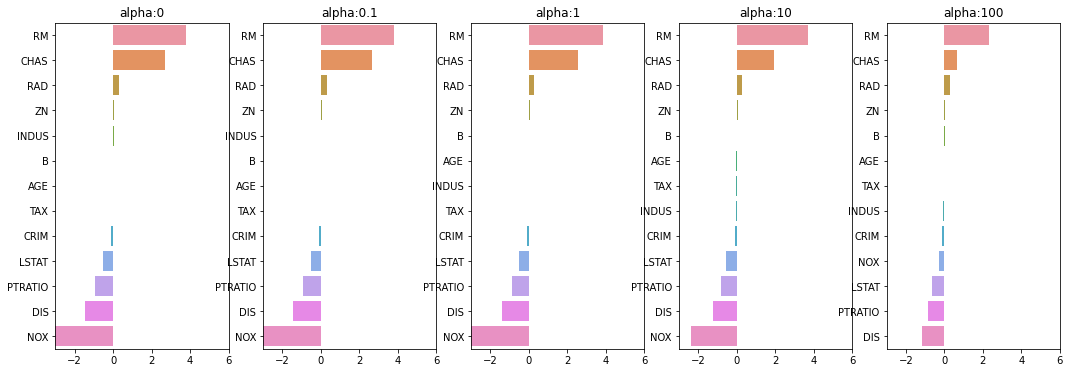

In [81]:
fig, axs = plt.subplots(figsize = (18, 6), nrows=1, ncols =5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [82]:
ridge_alphas = [0,0.1,1,10,100]
sort_column = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* alpha 값이 증가하면서 회귀 계수가 지속적으로 작아지고 있음
* 릿지회귀는 회귀계수를 0으로 만들지는 않음

# 라쏘회귀

### W의 절대값에 패널티를 부여하는 L1방식에 속함

* 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
* 적절한 피쳐만 회귀에 포함시키는 피쳐 선택

In [83]:
from sklearn.linear_model import Lasso, ElasticNet

In [112]:
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose =True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                            y_target_n, scoring = "neg_mean_squared_error", cv= 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
            
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
                
    return coeff_df

In [113]:
lasso_alphas = [0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)

######  Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


* alpha가 0.07일 때 가장 좋은 평균 RMSE

In [114]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=True)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
PTRATIO,-0.765107,-0.770654,-0.758752,-0.722966,-0.265072
LSTAT,-0.560431,-0.568769,-0.656290,-0.761115,-0.807679
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
B,0.010248,0.010249,0.009469,0.008247,0.006510
ZN,0.049059,0.049211,0.049544,0.049165,0.037231


* alpha 크기가 증가함에 따라 일부 피처의 회귀 계수가 아에 0으로 바뀜
* NOX: 0.07부터 0, alpha를 증가시키면서 INDUS, CHAS가 0으로 바뀜
* 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

# 엘라스틱넷 회귀

### L2와 L1을 결합한 회귀

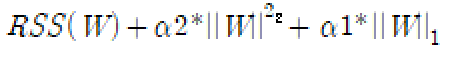

* 위의 식을 최소화 하는 W를 찾는 것
* 라쏘 회귀가 중요하지 않은 다른 피처들을 0으로 만들어서 alpha값에 따라 회귀 계수 값이 급격하게 변할 수 있으므로 이를 완화하기 위해 라쏘 회귀에 L2규제를 추가함
* 단점: 시간이 상대적으로 오래 걸림

* 주요 생성 파라미터: alpha, l1_ratio
* 엘라스틱넷의 alpha는 릿지, 라쏘와는 다르게 a+b 값
* l1_ratio 파라미터 값은 a/(a+b)

In [116]:
# l1_ratio값은 0.7으로 고정
elastic_alphas= [0.07,0.1,0.5,1.3]
coeff_elastic_df= get_linear_reg_eval('ElasticNet', params= elastic_alphas, X_data_n=X_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1.3일 때 5 폴드 세트의 평균 RMSE: 5.670


In [117]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.574162,3.414154,1.918419,0.560937
CHAS,1.330724,0.979706,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.273045
ZN,0.050107,0.050617,0.052878,0.050578
B,0.010122,0.010067,0.009114,0.007957
AGE,-0.010116,-0.008276,0.007760,0.026241
TAX,-0.014522,-0.014814,-0.016046,-0.015689
INDUS,-0.044855,-0.042719,-0.023252,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.064928
NOX,-0.175072,-0.000000,-0.000000,-0.000000


* alpha 가 0.5일 때 RMSE가 5.468로 가장 좋은 성능
* 라쏘보다 회귀계수가 0이 되는 값이 적음

### 어떤 것이 좋은지는 상황에 따라 다름 , 각각의 알고리즘에 하이퍼 파라미터를 변경해가면서 최적 예측 성능을 찾아야 함

# 데이터 변환

정규분포를 선호하고 왜곡이 있다면 성능에 부정적인 영향을 미칠 가능성이 높음

-> 중요 피처값이나 타깃잢의 분포가 심하게 왜곡됐을 경우 스케일링/정규화 작업 수행

정규분포 변환, 최댓값/최솟값 정규화, 로그변환
* 타깃값은 일반적으로 로그 변환 적용
* 1+log() = np.log1p()
* 그냥 log()적용하면 언더 플로우 발생 쉬움

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [128]:
def get_scaled_data(method = 'None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [129]:
alphas= [0.1,1,10,100]
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
    print('\n## 변환유형: {0}, polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose=False, return_coeff=False)


## 변환유형: None, polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330

## 변환유형: Standard, polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421

## 변환유형: Standard, polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634

## 변환유형: MinMax, polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635

## 변환유형: MinMax, polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538

## 변환유형: Log, polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 4.770

* 로그 변환일 때 모두 좋은 성능 향상